In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

PAS = 1
MACKA = -1

data = [
    [3, 7, PAS],
    [17, 3, MACKA],
    [15, 5, MACKA],
    [3, 3, PAS],
    [15, 3, MACKA],
    [3, 5, PAS]
]

p1 = [17, 5]
p2 = [3, 6.5]

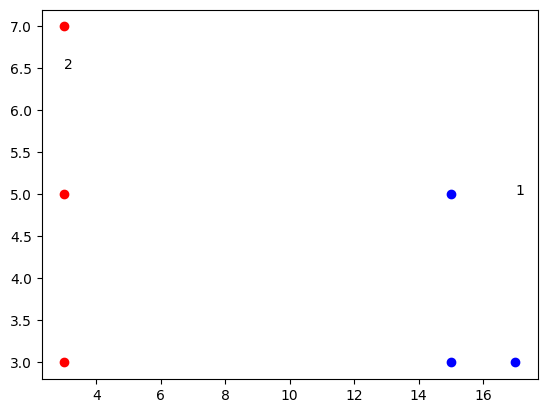

In [8]:
psi = np.array([x[:2] for x in data if x[2]==PAS])
macke = np.array([x[:2] for x in data if x[2]==MACKA])

fig, ax = plt.subplots()
ax.scatter(psi[:,0], psi[:,1], c='r')
ax.scatter(macke[:,0], macke[:,1], c='b')
ax.text(p1[0],p1[1], '1')
ax.text(p2[0],p2[1], '2')
plt.show()

In [10]:
def model(w, x):
    y = w[0]*x[0]+w[1]*x[1]+w[2]
    if y<0:
        return MACKA
    if y>0:
        return PAS
    return 0

def loss(data, model, w):
    err = 0
    n = len(data)
    for i in range(n):
        x = data[i][:2]
        izracunato = model(w, x)
        ocekivano = data[i][2]
        err += abs(izracunato-ocekivano)
    return err

def fit(data, model, loss):
    # pronaci w tako da loss bude najmanji
    w_best = None
    loss_best = None
    for it in range(100):
        w = [
            10*random.random()-5, # w0
            10*random.random()-5, # w1
            10*random.random()-5  # w2
        ]
        err = loss(data, model, w)
        if err==0:
            return w, err
        if loss_best==None or loss_best>err:
            w_best = w
            loss_best = err
    return w_best, loss_best

w, err = fit(data, model, loss)

print(w, err)

print(f'Klasa za 1 je {model(w, p1)} PAS={PAS}  MACKA={MACKA}')
print(f'Klasa za 2 je {model(w, p2)}')

[-0.9407821051670728, 1.2368957130627534, 0.9755735693410994] 0
Klasa za 1 je -1 PAS=1  MACKA=-1
Klasa za 2 je 1
